<a href="https://colab.research.google.com/github/kalra-nitish/NLP/blob/main/sentiment_analysis_tweets_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-07-05 18:35:15--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  10.5MB/s    in 0.3s    

2024-07-05 18:35:16 (10.5 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
df_ = pd.read_csv('AirlineTweets.csv')

In [9]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df = df_[['airline_sentiment', 'text']].copy()

In [11]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

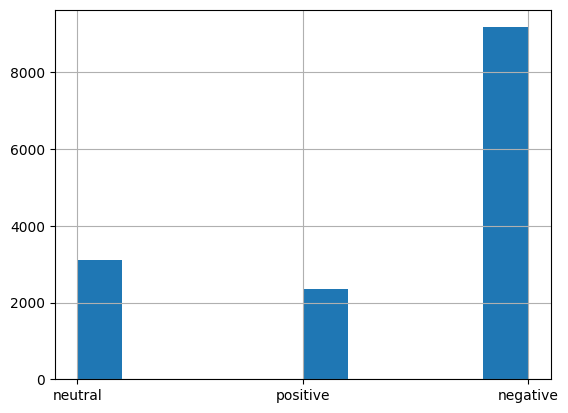

In [12]:
df['airline_sentiment'].hist()

In [13]:
target_map = {'positive' : 1, 'negative': 0, 'neutral': 2}

In [14]:
df['target'] = df['airline_sentiment'].map(target_map)

In [15]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [16]:
df_train, df_test = train_test_split(df)

In [17]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [18]:
df_test.head()

,airline_sentiment,text,target
8515,positive,@JetBlue I'll pass along the advice. You guys ...,1
3439,negative,@united I sent you a dm with my file reference...,0
6439,positive,@SouthwestAir Black History Commercial is real...,1
5112,negative,@SouthwestAir why am I still in Baltimore?! @d...,0
5645,positive,@SouthwestAir SEA to DEN. South Sound Volleyba...,1


In [19]:
vectorizer = TfidfVectorizer(max_features=2000)

In [20]:
X_train = vectorizer.fit_transform(df_train['text'])

In [22]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [24]:
X_test = vectorizer.transform(df_test['text'])

In [25]:
X_test

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 52230 stored elements in Compressed Sparse Row format>

In [26]:
Y_train = df_train['target']

In [27]:
Y_test = df_test['target']

In [28]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8548269581056467
Test acc: 0.7991803278688525


In [30]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9430974046358331
Test AUC: 0.8953986730393367


In [31]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [32]:
cm = confusion_matrix(Y_train, P_train, normalize='true')

In [33]:
cm

array([[0.96500653, 0.00813126, 0.0268622 ],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30193548, 0.0516129 , 0.64645161]])

In [34]:
def plot_cm(cm):
  classes=['postive', 'negative', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

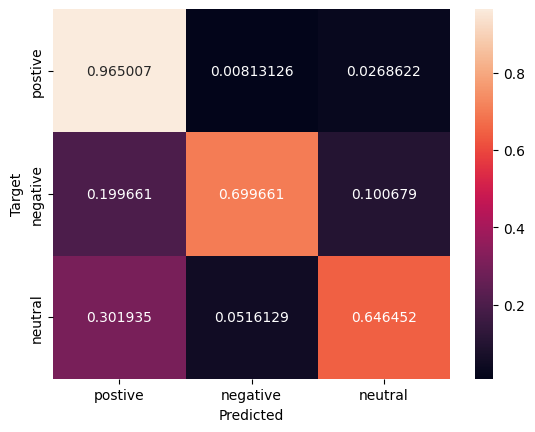

In [35]:
plot_cm(cm)

In [36]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')

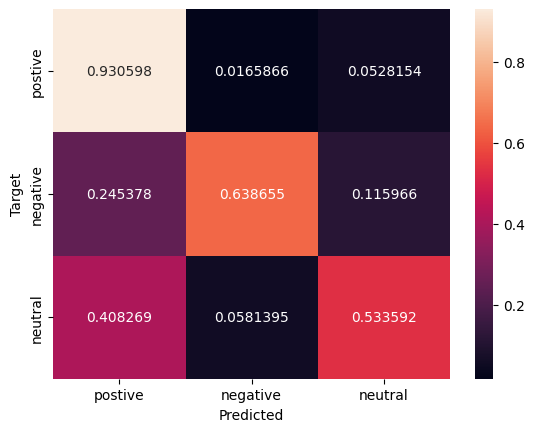

In [37]:
plot_cm(cm_test)

In [39]:
binary_target_list = [target_map['positive'],target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [40]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [41]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [42]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']


In [44]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train ACC:", model.score(X_train, Y_train))
print("Test ACC:", model.score(X_test, Y_test))

Train ACC: 0.9300982091276718
Test ACC: 0.9147609147609148


In [46]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train Auc:", roc_auc_score(Y_train, Pr_train))
print("Test Auc:", roc_auc_score(Y_test, Pr_test))

Train Auc: 0.9790315809115082
Test Auc: 0.9533010061292087


In [47]:
model.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

(array([  2.,   0.,   2.,   3.,   2.,  12.,  25.,  60., 183., 776., 550.,
        227.,  86.,  44.,  11.,   2.,   2.,   4.,   2.,   1.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.23787117, -3.82467728, -3.41148339, -2.9982895 , -2.58509561,
        -2.17190172, -1.75870783, -1.34551394, -0.93232006, -0.51912617,
        -0.10593228,  0.30726161,  0.7204555 ,  1.13364939,  1.54684328,
         1.96003717,  2.37323105,  2.78642494,  3.19961883,  3.61281272,
         4.02600661,  4.4392005 ,  4.85239439,  5.26558827,  5.67878216,
         6.09197605,  6.50516994,  6.91836383,  7.33155772,  7.74475161,
         8.1579455 ]),
 <BarContainer object of 30 artists>)

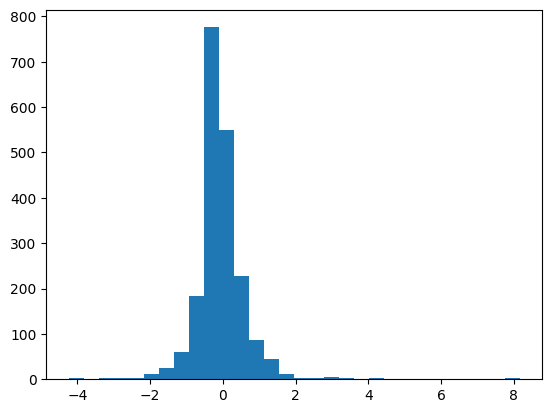

In [48]:
plt.hist(model.coef_[0], bins=30)

In [49]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [50]:
threshold = 2

In [51]:
print("Most Positive words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word, weight)

Most Positive words:
southwestair 2.8600756648514896
thank 8.070503978248222
great 5.208733897349233
best 3.6368642825162376
virginamerica 3.2284047967676655
thx 2.8083250879539405
jetblue 3.0216163024696443
good 3.2615369143995414
thanks 8.157945495533742
love 4.405152711235801
appreciate 2.9299264511255165
awesome 4.054714104270301
cool 2.0881519343377453
kudos 2.6141836318018443
amazing 4.194647955637536
worries 2.7116513040907093
wonderful 2.120412437675065


In [53]:
print("Most Negative words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < -threshold:
    print(word, weight)

Most Negative words:
hours -3.18012017285193
not -4.237871165123158
delayed -2.7045270959858145
hour -2.0696846300803164
but -2.221048457962789
cancelled -2.6770621928562077
nothing -2.0768244801835
what -2.014376186186617
no -3.970836170661347
worst -3.190035509681828
hold -2.790231540672249
why -2.22698798939604
luggage -2.162544497774524
